<a href="https://colab.research.google.com/github/nesrinebenrefifa/20-python-projects/blob/main/Driverdrow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Machine Learning
from tensorflow import keras
from tensorflow.keras import layers, models

# Other utilities
import os
import cv2


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os

# Define the path to the dataset
dataset_path = "/content/drive/MyDrive/drowsiness_dataset"

# Check if the path exists and list the contents
if os.path.exists(dataset_path):
    images = os.listdir(dataset_path)
    print("Dataset contents:", images)
else:
    print("The specified directory does not exist.")


Dataset contents: ['yawn', 'no_yawn', 'Closed', 'Open']


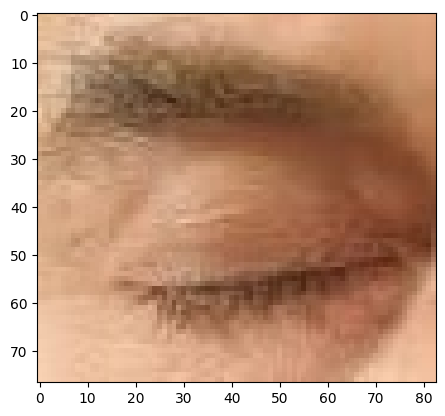

In [5]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/content/drive/MyDrive/drowsiness_dataset/Closed/_12.jpg"))

In [6]:
yawn = plt.imread("/content/drive/MyDrive/drowsiness_dataset/yawn/11.jpg")

In [7]:
yawn.shape

(480, 640, 3)

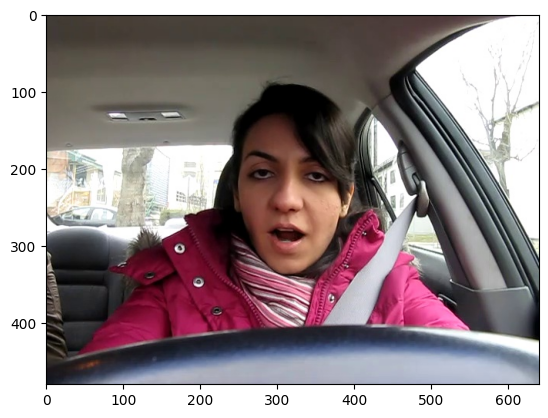

In [8]:
plt.imshow(plt.imread("/content/drive/MyDrive/drowsiness_dataset/yawn/10.jpg"))

In [9]:
import os
import cv2

def face_for_yawn(direc="/content/drive/MyDrive/drowsiness_dataset",
                  face_cas_path="/content/drive/MyDrive/prediction/haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]

    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)

        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)

            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])

    return yaw_no  # Move return statement outside of the loops

# Call the function
yawn_no_yawn = face_for_yawn()


0
1


In [10]:
def get_data(dir_path="/content/drive/MyDrive/drowsiness_dataset", face_cas="/content/drive/MyDrive/prediction/haarcascade_frontalface_default.xml", eye_cas="/content/drive/MyDrive/prediction/haarcascade.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
              print(e)
    return data


In [11]:
data_train = get_data()

2
3


In [12]:

# Combine the data from both functions
def append_data():
    yaw_no = face_for_yawn()  # Data for yawning detection
    data = get_data()         # Data for eye state detection
    yaw_no.extend(data)       # Combine both datasets

    # Separate the images and labels
    images = [item[0] for item in yaw_no]
    labels = [item[1] for item in yaw_no]

    # Convert to NumPy arrays
    images_array = np.array(images)
    labels_array = np.array(labels)

    return images_array, labels_array

# Call the append_data function and store the result
images_array, labels_array = append_data()

0
1
2
3


In [13]:
X, y = append_data()

# Display the shapes of X (features) and y (labels)
print("Shape of X (images):", X.shape)
print("Shape of y (labels):", y.shape)

0
1
2
3
Shape of X (images): (1925, 145, 145, 3)
Shape of y (labels): (1925,)


In [14]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

In [15]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [16]:
y = np.array(y)

In [74]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [75]:
len(X_test)

578

In [19]:
!pip install tensorflow keras


In [20]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=True)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

In [22]:
# model = Sequential()

# model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
# model.add(MaxPooling2D(2, 2))

# model.add(Conv2D(128, (3, 3), activation="relu"))
# model.add(MaxPooling2D(2, 2))

# model.add(Conv2D(64, (3, 3), activation="relu"))
# model.add(MaxPooling2D(2, 2))
# model.add(Conv2D(32, (3, 3), activation="relu"))
# model.add(MaxPooling2D(2, 2))

# model.add(Flatten())
# model.add(Dropout(0.5))

# model.add(Dense(64, activation="relu"))
# model.add(Dense(4, activation="softmax"))

# model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# model.summary()


NameError: name 'Sequential' is not defined

In [76]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Data Generators
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(X_train, y_train, batch_size=32, shuffle=True)
test_generator = test_generator.flow(X_test, y_test, batch_size=32, shuffle=False)

# Model Definition
model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")


model.summary()
# # Callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# Fit the model
history = model.fit(train_generator,
                    epochs=50,
                    validation_data=test_generator,
                    shuffle=True,
                    )


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 143, 143, 256)       │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 71, 71, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 69, 69, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 34, 34, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 14, 14, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │         100,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 495,140 (1.89 MB)

 Trainable params: 495,140 (1.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 404ms/step - accuracy: 0.3970 - loss: 1.2756 - val_accuracy: 0.8045 - val_loss: 0.5248
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 219ms/step - accuracy: 0.7816 - loss: 0.5681 - val_accuracy: 0.8599 - val_loss: 0.4082
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 172ms/step - accuracy: 0.8357 - loss: 0.4034 - val_accuracy: 0.8754 - val_loss: 0.3035
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 217ms/step - accuracy: 0.8364 - loss: 0.3834 - val_accuracy: 0.9118 - val_loss: 0.2572
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - accuracy: 0.8520 - loss: 0.3124 - val_accuracy: 0.9221 - val_loss: 0.2199
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 171ms/step - accuracy: 0.8895 - loss: 0.2682 - val_accuracy: 0.9256 - val_loss: 0.2284
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 218ms/step - accuracy: 0.8620 - loss: 0.3138 - val_accuracy: 0.9170 - val_loss: 0.2592
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 184ms/step - accuracy: 0.8925 - loss: 0.2682 - val_accuracy: 0.9031 

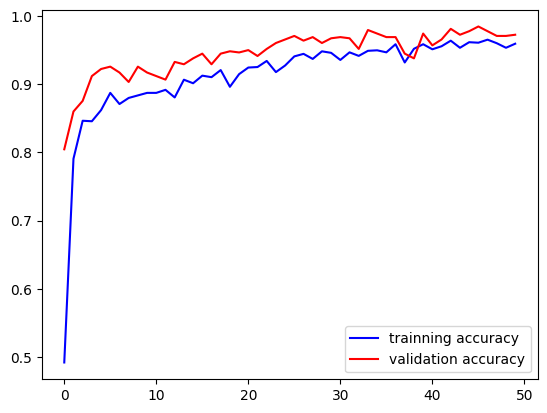

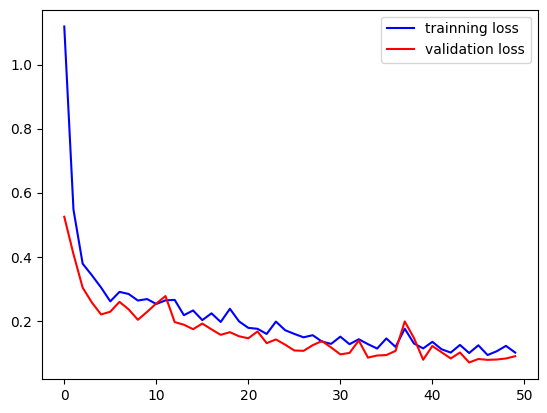

In [77]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [80]:
model.save("drowiness.h5")

In [79]:
model.save("drowsiness.keras")


In [81]:
import numpy as np

# Get predicted probabilities
predictions = model.predict(X_test)

# Convert probabilities to class labels (assuming binary or multi-class classification)
predicted_classes = np.argmax(predictions, axis=1)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


In [82]:
predicted_classes = (predictions > 0.5).astype("int32")


In [83]:
predicted_classes

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0]], dtype=int32)

In [84]:
prediction = model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [85]:
prediction

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [105]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
              precision    recall  f1-score   support

        yawn       0.86      0.90      0.88        63
     no_yawn       0.93      0.84      0.88        74
      Closed       0.95      0.98      0.96       215
        Open       0.96      0.95      0.96       226

    accuracy                           0.94       578
   macro avg       0.92      0.92      0.92       578
weighted avg       0.94      0.94      0.94       578



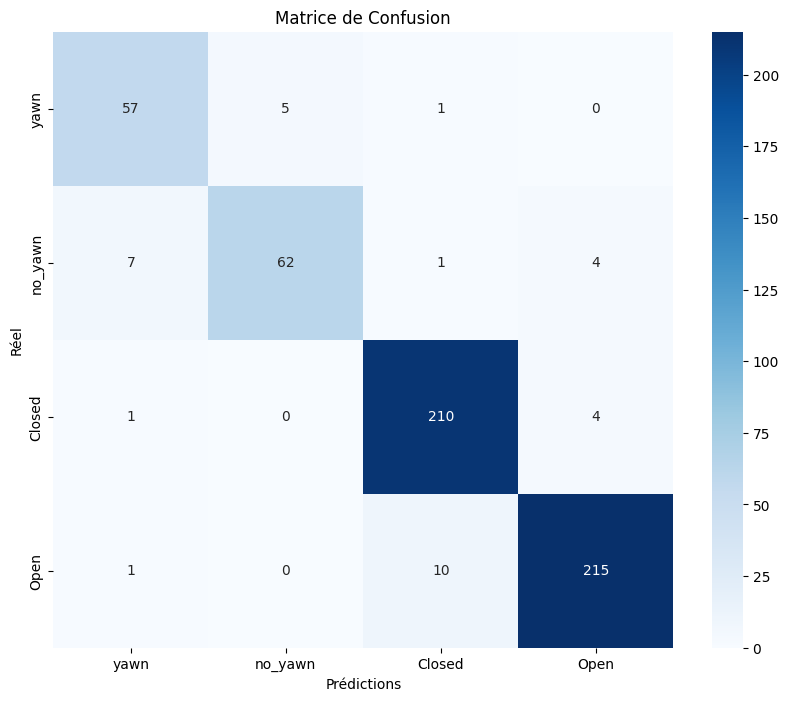

In [106]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Afficher le rapport de classification
print(classification_report(y_true_classes, y_pred_classes, target_names=labels_new))

# Matrice de confusion
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Visualiser la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=labels_new, yticklabels=labels_new)
plt.xlabel('Prédictions')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()


In [108]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9344 - loss: 23.5394
Test Loss: 21.7515811920166, Test Accuracy: 0.9411764740943909


In [88]:
import numpy as np
import cv2
import tensorflow as tf

# Load your trained model
model = tf.keras.models.load_model("./drowiness.h5")

# Labels
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145

# Prepare the image for prediction
def prepare(filepath, face_cas="/content/drive/MyDrive/prediction/haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)  # Read image
    img_array = img_array / 255.0                      # Normalize image
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # Resize image
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)      # Reshape for model input

# Path to your image
image_path = "/content/drive/MyDrive/drowsiness_dataset/no_yawn/1067.jpg"  # Replace with the path to your image

# Prepare the image
image = prepare(image_path)

# Predict the class of the image
predictions = model.predict(image)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Get the label corresponding to the predicted class index
predicted_label = labels_new[predicted_class_index]

# Print the predicted class label
print(f"The predicted class is: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
The predicted class is: no_yawn


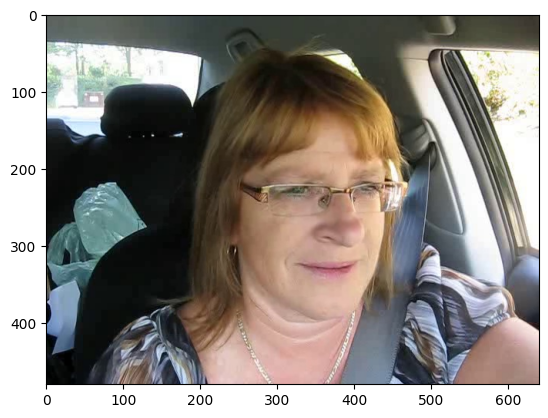

In [89]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/content/drive/MyDrive/drowsiness_dataset/no_yawn/1067.jpg"))

In [90]:
# Prepare the image and make a prediction
prediction = model.predict([prepare("/content/drive/MyDrive/drowsiness_dataset/Closed/_101.jpg")])

# Get the predicted class index
predicted_class_index = np.argmax(prediction)

# Output the predicted class index
print(predicted_class_index)

# Optionally, print the corresponding class label
predicted_label = labels_new[predicted_class_index]
print(f"Predicted class label: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
2
Predicted class label: Closed


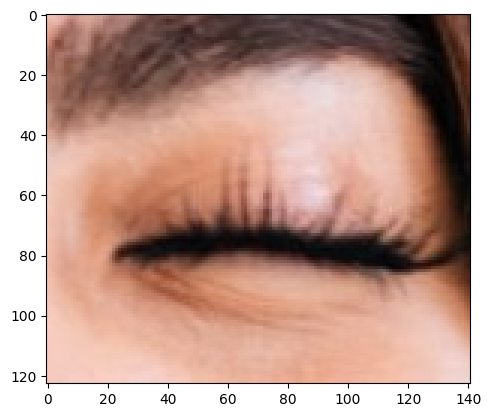

In [55]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/content/drive/MyDrive/drowsiness_dataset/Closed/_101.jpg"))

In [91]:
# Make sure the image is loaded correctly and predict
prediction = model.predict([prepare("/content/drive/MyDrive/drowsiness_dataset/Open/_104.jpg")])

# Get the index of the predicted class
predicted_class_index = np.argmax(prediction)

# Output the predicted class index
print(predicted_class_index)

# Optionally, print the corresponding class label
predicted_label = labels_new[predicted_class_index]
print(f"Predicted class label: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3
Predicted class label: Open


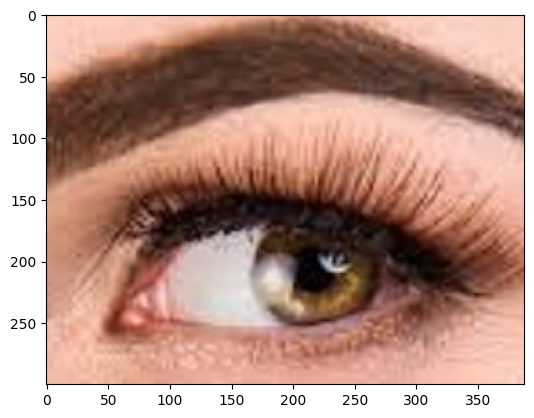

In [65]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/content/drive/MyDrive/drowsiness_dataset/Open/_104.jpg"))

In [95]:
prediction = model.predict([prepare("/content/drive/MyDrive/drowsiness_dataset/yawn/10.jpg")])
np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


2

In [110]:
import numpy as np
from tensorflow.keras.models import load_model

# Chargez votre modèle
model = load_model("./drowiness.h5")

# Recompilez le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Évaluez le modèle sur l'ensemble de test
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Prédictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.9344 - loss: 23.5394
Test Loss: 21.7515811920166, Test Accuracy: 0.9411764740943909
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


In [96]:
pip install opencv-python


In [112]:
import tensorflow as tf

model = tf.keras.models.load_model("drowiness.h5")


In [4]:
import cv2
import numpy as np

# Chargement du classifieur de visage
face_cascade = cv2.CascadeClassifier("/content/drive/MyDrive/prediction/haarcascade_frontalface_default.xml")

# Ouvrir la caméra
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    if not ret:
        break

    # Conversion de l'image en niveaux de gris
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Détection de visage
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    # Pour chaque visage détecté
    for (x, y, w, h) in faces:
        # Découper la région du visage
        face = frame[y:y+h, x:x+w]
        face = cv2.resize(face, (145, 145))  # Redimensionnement à la taille requise
        face = face / 255.0  # Normalisation
        face = np.reshape(face, (1, 145, 145, 3))  # Changement de la forme pour le modèle

        # Prédiction
        prediction = model.predict(face)
        label = np.argmax(prediction)

        # Ajouter un texte pour le label
        if label == 0:
            text = "Yawn"
        elif label == 1:
            text = "No Yawn"
        elif label == 2:
            text = "Closed"
        elif label == 3:
            text = "Open"

        # Dessiner un rectangle autour du visage et mettre un label
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(frame, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Afficher le cadre avec les prédictions
    cv2.imshow('Drowsiness Detection', frame)

    # Sortir de la boucle en appuyant sur 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Libérer la caméra et fermer les fenêtres
cap.release()
cv2.destroyAllWindows()


In [114]:
cap = cv2.VideoCapture(1)  # Essayer avec 1 ou 2


In [115]:
pip show opencv-python


Name: opencv-python
Version: 4.10.0.84
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy
Required-by: dopamine_rl, imgaug
